## Import Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [33]:
data=pd.read_csv('pulsar_stars.csv')

In [34]:
data.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [35]:
data.shape

(17898, 9)

## Data Preprocessing

In [36]:
data.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [37]:
data.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

## Feature Selection

In [38]:
correlation=data.corr()['target_class']
correlation

 Mean of the integrated profile                 -0.673181
 Standard deviation of the integrated profile   -0.363708
 Excess kurtosis of the integrated profile       0.791591
 Skewness of the integrated profile              0.709528
 Mean of the DM-SNR curve                        0.400876
 Standard deviation of the DM-SNR curve          0.491535
 Excess kurtosis of the DM-SNR curve            -0.390816
 Skewness of the DM-SNR curve                   -0.259117
target_class                                     1.000000
Name: target_class, dtype: float64

In [39]:
data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [41]:
high_corr = correlation[(correlation>0.5)]
high_corr.drop('target_class', axis=0, inplace=True)

In [42]:
features = list(high_corr.index)

print(features)

[' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile']


In [43]:
X = data[features]
y = data['target_class']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Data visualization

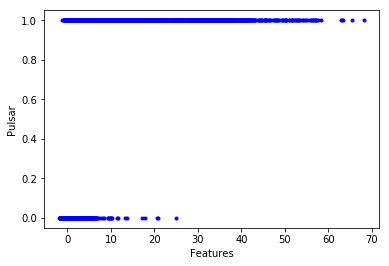

In [45]:
plt.plot(X,y,'b.')
plt.xlabel('Features')
plt.ylabel('Pulsar')
plt.show()

## Logistic Regression

### Model Building

In [46]:
from sklearn import linear_model

model = linear_model.LogisticRegression(multi_class='auto')

In [47]:
model.fit(X_train, y_train)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Model Evaluation

In [48]:
train_accuracy = model.score(X_train, y_train)
print('Train-set accuracy \t: ', train_accuracy)

test_accuracy = model.score(X_test, y_test)
print('Test-set accuracy \t: ', test_accuracy)

Train-set accuracy 	:  0.9756484029688933
Test-set accuracy 	:  0.9768071779244963
